In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import stylize

# Reproduce the images on the paper

tubingen.jpg was resized from (960, 720) to (300, 225)
shipwreck.jpg was resized from (700, 483) to (300, 225)
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 1711636.875000
  Number of iterations: 100
  Number of functions evaluations: 106
tubingen_shipwreck_w300_i100_lr1.0_alpha1_beta5_nr0.1_lbfgs_avg_ps2_sllw0.2_snl5_cln4_time0.2.jpg


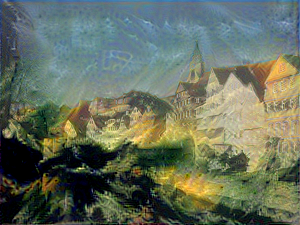

In [4]:
content = 'tubingen.jpg'
style = 'shipwreck.jpg'

stylize.apply(content, style, learning_rate=1.0,iters=100, 
              alpha=1, beta=5, noise_ratio=0.1, new_width=300, pool_method='avg',
              pool_stride=2, style_loss_layers_w=(0.2, 0.2, 0.2, 0.2, 0.2), 
              style_num_layers=5, content_layer_num=4, optimizer='lbfgs')

tubingen.jpg was resized from (960, 720) to (300, 225)
starry_night.jpg was resized from (360, 285) to (300, 225)
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 53480208.000000
  Number of iterations: 50
  Number of functions evaluations: 57
tubingen_starry_night_w300_i50_lr1.0_alpha1_beta100_nr0.1_lbfgs_avg_ps2_sllw0.2_snl5_cln4_time0.2.jpg


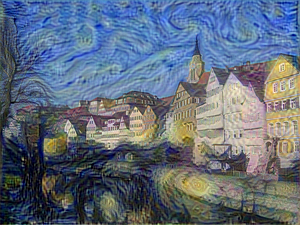

In [5]:
content = 'tubingen.jpg'
style = 'starry_night.jpg'

stylize.apply(content, style, learning_rate=1.0,iters=50, 
              alpha=1, beta=100, noise_ratio=0.1, new_width=300, pool_method='avg',
              pool_stride=2, style_loss_layers_w=(0.2, 0.2, 0.2, 0.2, 0.2), 
              style_num_layers=5, content_layer_num=4, optimizer='lbfgs')

tubingen.jpg was resized from (960, 720) to (300, 225)
scream.jpg was resized from (640, 795) to (300, 225)
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 1847205120.000000
  Number of iterations: 40
  Number of functions evaluations: 46
tubingen_scream_w300_i40_lr2.0_alpha1_beta1000_nr0.1_lbfgs_avg_ps2_sllw0.2_snl5_cln4_time0.2.jpg


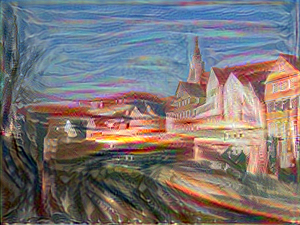

In [6]:
content = 'tubingen.jpg'
style = 'scream.jpg'

stylize.apply(content, style, learning_rate=2.0,iters=40, 
              alpha=1, beta=1000, noise_ratio=0.1, new_width=300, pool_method='avg',
              pool_stride=2, style_loss_layers_w=(0.2, 0.2, 0.2, 0.2, 0.2), 
              style_num_layers=5, content_layer_num=4, optimizer='lbfgs')

tubingen.jpg was resized from (960, 720) to (300, 225)
seated_nude.jpg was resized from (576, 750) to (300, 225)
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 152655584.000000
  Number of iterations: 150
  Number of functions evaluations: 155
tubingen_seated_nude_w300_i150_lr1.0_alpha1_beta1000_nr0.1_lbfgs_avg_ps2_sllw0.2_snl5_cln4_time0.4.jpg


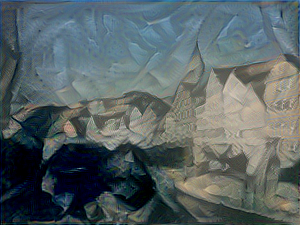

In [15]:
content = 'tubingen.jpg'
style = 'seated_nude.jpg'

stylize.apply(content, style, learning_rate=1.0,iters=200, 
              alpha=1, beta=1000, noise_ratio=0.7, new_width=300, pool_method='avg',
              pool_stride=2, style_loss_layers_w=(0.2, 0.2, 0.2, 0.2, 0.2), 
              style_num_layers=5, content_layer_num=4, optimizer='lbfgs')

tubingen.jpg was resized from (960, 720) to (300, 225)
composition7.jpg was resized from (1000, 657) to (300, 225)
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 362121408.000000
  Number of iterations: 300
  Number of functions evaluations: 319
tubingen_composition7_w300_i300_lr1.0_alpha1_beta1000_nr0.6_lbfgs_avg_ps2_sllw0.2_snl5_cln4_time0.2.jpg


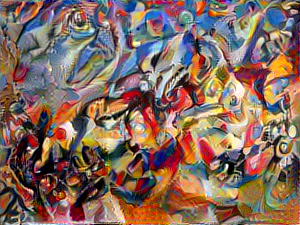

In [8]:
content = 'tubingen.jpg'
style = 'composition7.jpg'

stylize.apply(content, style, learning_rate=1.0, iters=300, 
              alpha=1, beta=1000, noise_ratio=0.6, new_width=300, pool_method='avg',
              pool_stride=2, style_loss_layers_w=(0.2, 0.2, 0.2, 0.2, 0.2), 
              style_num_layers=5, content_layer_num=4, optimizer='lbfgs')

# Our team with starry night style

csjl.jpeg was resized from (1600, 1200) to (300, 225)
starry_night.jpg was resized from (360, 285) to (300, 225)
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 4881014.500000
  Number of iterations: 70
  Number of functions evaluations: 78
csjl_starry_night_w300_i70_lr1.0_alpha1_beta10_nr0.6_lbfgs_avg_ps2_sllw0.2_snl5_cln4_time0.3.jpg


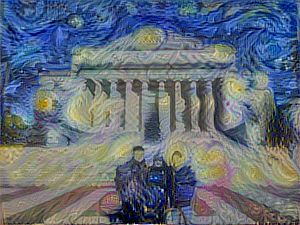

In [9]:
content = 'csjl.jpeg'
style = 'starry_night.jpg'

stylize.apply(content, style, learning_rate=1.0,iters=70, 
              alpha=1, beta=10, noise_ratio=0.6, new_width=300, pool_method='avg',
              pool_stride=2, style_loss_layers_w=(0.2, 0.2, 0.2, 0.2, 0.2), 
              style_num_layers=5, content_layer_num=4, optimizer='lbfgs')

# Thank you!

# *Additional Results from Experiments
After reproducing all the results on the original research paper, we experimented different hyperparameters to gain deeper understanding of the model.

### Experiments#1 Impact of iterations

In [2]:
content = 'tubingen.jpg'
style = 'starry_night.jpg'

for iter_num in range(100, 1001, 100):
    print ("With {} iterations, the result is:".format(iter_num))
    stylize.apply(content, style, learning_rate=1.0,iters=iter_num, 
                  alpha=1, beta=100, noise_ratio=0.1, new_width=300, 
                  pool_method='avg', pool_stride=2, 
                  style_loss_layers_w=(0.2, 0.2, 0.2, 0.2, 0.2), 
                  style_num_layers=5, content_layer_num=4, optimizer='lbfgs')

With 100 iterations, the result is:
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 21380136.000000
  Number of iterations: 100
  Number of functions evaluations: 108
tubingen_starry_night_w300_i100_lr1.0_alpha1_beta100_nr0.1_lbfgs_avg_ps2_sllw0.2_snl5_cln4_time0.2.jpg
With 200 iterations, the result is:
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 10578842.000000
  Number of iterations: 200
  Number of functions evaluations: 210
tubingen_starry_night_w300_i200_lr1.0_alpha1_beta100_nr0.1_lbfgs_avg_ps2_sllw0.2_snl5_cln4_time0.1.jpg
With 300 iterations, the result is:
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 7458298.500000
  Number of iterations: 300
  Number of functions evaluations: 312
tubingen_starry_night_w300_i300_lr1.0_alph

### Experiments#2 Impact of noise rate

In [3]:
content = 'tubingen.jpg'
style = 'starry_night.jpg'

for noise_rate in [0, 0.1, 0.3, 0.5, 0.7, 1]:
    print ("With noise rate as {}, the result is:".format(noise_rate))
    stylize.apply(content, style, learning_rate=1.0,iters=100, 
                  alpha=1, beta=100, noise_ratio=noise_rate, new_width=300, 
                  pool_method='avg', pool_stride=2, 
                  style_loss_layers_w=(0.2, 0.2, 0.2, 0.2, 0.2), 
                  style_num_layers=5, content_layer_num=4, optimizer='lbfgs')

With noise rate as 0, the result is:
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 21167024.000000
  Number of iterations: 100
  Number of functions evaluations: 109
tubingen_starry_night_w300_i100_lr1.0_alpha1_beta100_nr0_lbfgs_avg_ps2_sllw0.2_snl5_cln4_time0.4.jpg
With noise rate as 0.1, the result is:
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 21146116.000000
  Number of iterations: 100
  Number of functions evaluations: 107
tubingen_starry_night_w300_i100_lr1.0_alpha1_beta100_nr0.1_lbfgs_avg_ps2_sllw0.2_snl5_cln4_time0.5.jpg
With noise rate as 0.3, the result is:
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 23408608.000000
  Number of iterations: 100
  Number of functions evaluations: 110
tubingen_starry_night_w300_i100_lr1.

### Experiments#3 Different weights for style layers losses

In [4]:
content = 'tubingen.jpg'
style = 'starry_night.jpg'

for losses_weights in [(0.0125, 0.05, 0.0625, 0.25, 0.625),
                      (0.2, 0.2, 0.2, 0.2, 0.2),
                      (0.625, 0.25, 0.0625, 0.05, 0.0125)]:
    stylize.apply(content, style, learning_rate=1.0,iters=100, 
                  alpha=1, beta=100, noise_ratio=0.1, new_width=300, 
                  pool_method='avg', pool_stride=2, 
                  style_loss_layers_w=losses_weights, 
                  style_num_layers=5, content_layer_num=4, optimizer='lbfgs')

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 25777272.000000
  Number of iterations: 100
  Number of functions evaluations: 109
tubingen_starry_night_w300_i100_lr1.0_alpha1_beta100_nr0.1_lbfgs_avg_ps2_sllw0.625_snl5_cln4_time0.7.jpg
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 22272890.000000
  Number of iterations: 100
  Number of functions evaluations: 109
tubingen_starry_night_w300_i100_lr1.0_alpha1_beta100_nr0.1_lbfgs_avg_ps2_sllw0.2_snl5_cln4_time0.7.jpg
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 5267992.000000
  Number of iterations: 100
  Number of functions evaluations: 112
tubingen_starry_night_w300_i100_lr1.0_alpha1_beta100_nr0.1_lbfgs_avg_ps2_sllw0.0125_snl5_cln4_time0.7.jpg


### Experiments#4 Use different content layer to represent content loss

In [5]:
content = 'tubingen.jpg'
style = 'starry_night.jpg'

for con_layer in range(5):
    print ("By using {} layer of content, the result is:".format(con_layer+1))
    stylize.apply(content, style, learning_rate=1.0,iters=100, 
                  alpha=1, beta=100, noise_ratio=0.1, new_width=300, pool_method='avg',
                  pool_stride=2, style_loss_layers_w=(0.2, 0.2, 0.2, 0.2, 0.2), 
                  style_num_layers=5, content_layer_num=con_layer+1, optimizer='lbfgs')

By using 1 layer of content, the result is:
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 22826480.000000
  Number of iterations: 100
  Number of functions evaluations: 107
tubingen_starry_night_w300_i100_lr1.0_alpha1_beta100_nr0.1_lbfgs_avg_ps2_sllw0.2_snl5_cln1_time0.8.jpg
By using 2 layer of content, the result is:
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 22024128.000000
  Number of iterations: 100
  Number of functions evaluations: 109
tubingen_starry_night_w300_i100_lr1.0_alpha1_beta100_nr0.1_lbfgs_avg_ps2_sllw0.2_snl5_cln2_time0.8.jpg
By using 3 layer of content, the result is:
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 23138992.000000
  Number of iterations: 100
  Number of functions evaluations: 109
tubingen_starry_n

### Experiments#5 Use different alpha/beta settings

In [7]:
content = 'tubingen.jpg'
style = 'starry_night.jpg'

for alpha_current,beta_current in [(1,0),(100,1),(10,1),(1,1),(1,10),(1,100)]:
    print ("By using alpha as {} and beta as {}, the result is:".format(alpha_current, beta_current))
    stylize.apply(content, style, learning_rate=1.0,iters=100, 
                  alpha=alpha_current, beta=beta_current, noise_ratio=0.1, 
                  new_width=300, pool_method='avg', pool_stride=2, 
                  style_loss_layers_w=(0.2, 0.2, 0.2, 0.2, 0.2), 
                  style_num_layers=5, content_layer_num=4, optimizer='lbfgs')

By using alpha as 1 and beta as 0, the result is:
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 0.000297
  Number of iterations: 0
  Number of functions evaluations: 1
tubingen_starry_night_w300_i100_lr1.0_alpha1_beta0_nr0.1_lbfgs_avg_ps2_sllw0.2_snl5_cln4_time0.1.jpg
By using alpha as 100 and beta as 1, the result is:
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 223808.078125
  Number of iterations: 100
  Number of functions evaluations: 108
tubingen_starry_night_w300_i100_lr1.0_alpha100_beta1_nr0.1_lbfgs_avg_ps2_sllw0.2_snl5_cln4_time1.0.jpg
By using alpha as 10 and beta as 1, the result is:
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 212847.781250
  Number of iterations: 100
  Number of functions evaluations: 107
tubingen

### Experiments#6 Different learning rate

In [9]:
content = 'tubingen.jpg'
style = 'starry_night.jpg'

for l_rate in [0.001,0.01,0.1,1,10,100]:
    print ("By using learning rate as {}, the result is:".format(l_rate))
    stylize.apply(content, style, learning_rate=l_rate,iters=100, 
                  alpha=1, beta=100, noise_ratio=0.1, new_width=300, 
                  pool_method='avg', pool_stride=2, 
                  style_loss_layers_w=(0.2, 0.2, 0.2, 0.2, 0.2), 
                  style_num_layers=5, content_layer_num=4, optimizer='adam')

By using learning rate as 0.001, the result is:
tubingen_starry_night_w300_i0_lr0.001_alpha1_beta100_nr0.1_adam_avg_ps2_sllw0.2_snl5_cln4_time0.0.jpg
tubingen_starry_night_w300_i100_lr0.001_alpha1_beta100_nr0.1_adam_avg_ps2_sllw0.2_snl5_cln4_time0.1.jpg
By using learning rate as 0.01, the result is:
tubingen_starry_night_w300_i0_lr0.01_alpha1_beta100_nr0.1_adam_avg_ps2_sllw0.2_snl5_cln4_time0.0.jpg
tubingen_starry_night_w300_i100_lr0.01_alpha1_beta100_nr0.1_adam_avg_ps2_sllw0.2_snl5_cln4_time0.1.jpg
By using learning rate as 0.1, the result is:
tubingen_starry_night_w300_i0_lr0.1_alpha1_beta100_nr0.1_adam_avg_ps2_sllw0.2_snl5_cln4_time0.0.jpg
tubingen_starry_night_w300_i100_lr0.1_alpha1_beta100_nr0.1_adam_avg_ps2_sllw0.2_snl5_cln4_time0.1.jpg
By using learning rate as 1, the result is:
tubingen_starry_night_w300_i0_lr1_alpha1_beta100_nr0.1_adam_avg_ps2_sllw0.2_snl5_cln4_time0.0.jpg
tubingen_starry_night_w300_i100_lr1_alpha1_beta100_nr0.1_adam_avg_ps2_sllw0.2_snl5_cln4_time0.1.jpg
By us

### Experiments#7 Max pooling vs Average pooling

In [10]:
content = 'tubingen.jpg'
style = 'starry_night.jpg'

for opt,stride_curr in [('max',2),('max',5),('max',20),
                       ('avg',2),('avg',5),('avg',20)]:
    print ("By using {} optimizer and stride as {}, the result is:".format(opt,stride_curr))
    stylize.apply(content, style, learning_rate=l_rate,iters=100, 
                  alpha=1, beta=100, noise_ratio=0.1, new_width=300, pool_method=opt,
                  pool_stride=stride_curr, style_loss_layers_w=(0.2, 0.2, 0.2, 0.2, 0.2), 
                  style_num_layers=5, content_layer_num=4, optimizer='lbfgs')

By using max optimizer and stride as 2, the result is:
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 976198208.000000
  Number of iterations: 100
  Number of functions evaluations: 106
tubingen_starry_night_w300_i100_lr100_alpha1_beta100_nr0.1_lbfgs_max_ps2_sllw0.2_snl5_cln4_time1.3.jpg
By using max optimizer and stride as 5, the result is:
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 45475348480.000000
  Number of iterations: 100
  Number of functions evaluations: 108
tubingen_starry_night_w300_i100_lr100_alpha1_beta100_nr0.1_lbfgs_max_ps5_sllw0.2_snl5_cln4_time1.3.jpg
By using max optimizer and stride as 20, the result is:
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 1150566656.000000
  Number of iterations: 100
  Number of func

### Experiments#8 Different pooling stride size

In [11]:
content = 'tubingen.jpg'
style = 'starry_night.jpg'

for stride_curr in [2,3,5,10,20]:
    print ("By using {} optimizer and stride as {}, the result is:".format(opt,stride_curr))
    stylize.apply(content, style, learning_rate=l_rate,iters=100, 
                  alpha=1, beta=100, noise_ratio=0.1, new_width=300, pool_method='avg',
                  pool_stride=stride_curr, style_loss_layers_w=(0.2, 0.2, 0.2, 0.2, 0.2), 
                  style_num_layers=5, content_layer_num=4, optimizer='lbfgs')

By using avg optimizer and stride as 2, the result is:
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 23211240.000000
  Number of iterations: 100
  Number of functions evaluations: 111
tubingen_starry_night_w300_i100_lr100_alpha1_beta100_nr0.1_lbfgs_avg_ps2_sllw0.2_snl5_cln4_time1.6.jpg
By using avg optimizer and stride as 3, the result is:
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 31105996.000000
  Number of iterations: 100
  Number of functions evaluations: 110
tubingen_starry_night_w300_i100_lr100_alpha1_beta100_nr0.1_lbfgs_avg_ps3_sllw0.2_snl5_cln4_time1.5.jpg
By using avg optimizer and stride as 5, the result is:
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 4027630.000000
  Number of iterations: 100
  Number of functions ev